# AB - Module 5

Не всегда метод максимума правдоподобия можно применить так, чтобы найти аналитическое решение, то есть формулу для поиска параметров распределения по выборке.

Альтернативный вариант — использование методов оптимизации, в который можно подать оптимизируемый функционал и опционально его градиент, чтобы алгоритмы нашли для нас точку оптимума.

Давайте попробуем это сделать. Снова вернёмся к известной нам выборке со средними ценами на дома:

```python
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 
```

Постройте гистограмму медианного дохода (MedInc), чтобы оценить, на какое распределение похожа эта случайная величина. На какое распределения более всего похоже наше распределение? Если вы не помните или не знаете какое-то из распределений, можете прочитать про него подробнее на Википедии и увидеть иллюстрации.

In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='MedInc', ylabel='Density'>

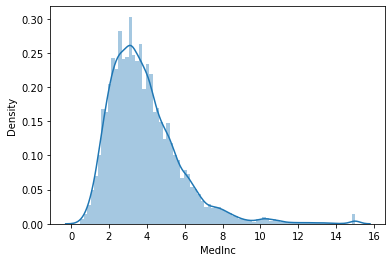

In [2]:
import seaborn as sns

sns.distplot(df['MedInc'],bins=80,kde=True)

Кроме логнормального распределения сюда подходит ещё и гамма-распределение. Давайте найдём параметры распределения под нашу выборку. У него есть два основных параметра, хотя в версии из scipy вводят также сдвиг (loc). Мы его будем полагать равным 0 (тогда носитель распределение, то есть возможные значения — положительные числа), а другие два: a, scale — будем искать. 

Для этого сначала реализуйте функцию, которая будет вычислять логарифм правдоподобия для нашей выборки. Вам понадобится распределения gamma из библиотеки scipy. Функция должна принимать на вход один аргумент, в котором будут расположены все нужные вам параметры. 

Далее воспользуйтесь функцией minimize из модуля optimize библиотеки scipy. Там реализованы методы оптимизации. Укажите вашу функцию для вычисления логарифма правдоподобия, начальное значение ваших параметров и метод L-BFGS-B.

В качестве начального приближения возьмите a=1, scale=2. Если становится сложно, то воспользуйтесь похожим примером из лекции. Имейте в виду, что здесь мы не указываем, как рассчитывается градиент и гессиан (вторая производная) для нашей функции, поэтому они будут рассчитываться численно, что обычно плохо сказывается на процессе оптимизации.

Для проверки нарисуйте на одном графике гистограмму вашей случайной величины и плотность распределения с настроенными параметрами (метод pdf для расчёта плотности, а в качестве точек можно точки с равномерной сетки с помощью np.linspace). Должны получаться похожие картинки.

Какие значения параметров вы получили?

In [10]:
from scipy.stats import gamma
from scipy.optimize import minimize
import numpy as np

In [11]:
def loglik(theta: tuple):
    a, scale = theta
    X = df['MedInc']
    lpdf = gamma.logpdf(X, a=a, loc=0, scale=scale)

    LL = np.sum(lpdf)

    return(-LL)


In [12]:
minimize(fun=loglik, x0=(1, 2), method='L-BFGS-B')

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 39616.8933401287
        x: [ 4.749e+00  8.150e-01]
      nit: 14
      jac: [ 5.093e-03  2.692e-02]
     nfev: 54
     njev: 18
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Посчитайте ядерную оценку плотности в точке x=6 для медианного дохода с помощью sklearn.neighbors.KernelDensity с треугольным (линейным) ядром и h=0.5. Вам понадобятся методы fit (настройка) и score_samples (применение). Учтите, что вам вернутся логарифмы оценки, так что надо от них взять экспоненту.

In [1]:
from sklearn.neighbors import KernelDensity